<img src="../support_files/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Python Bootcamp</h1> 
<h3 align="center">August 20-21, 2016</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<center><h1>Custom Modules and Version Control</h1></center>

<p>We have seen that new functinoality in Python can be encapsulated as a <i>module</i>, and that we can import modules into our own code. In this section we will create a new Python module. 

- Important because encapsulating functions makes them <i>reusable</i>. We will use this mechanism to develop tools that we can share with each other during the course.

- We would also like to be able to <i>collaborate</i> on these tools, so at the same time we will look at some of the basics of using git to track changes to our module. This will lay the foundation for collaborative workflows with git that will be dicussed later in the course.

- Jupyter is not (currently) a good tool for developing modules or for learning about git, so we will do most of our work with a text editor and a command prompt for this section.

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Let's begin by making a simple module. For now, it will contain just one function we can use to downsample time-series data.
</div>

In [1]:
# here is the code we'd like to include in the module:

import numpy as np

def downsample(data, n, axis=0):
    """Reduce the number of samples in an array by averaging together
    n samples at a time.
    """
    if n <= 1:
        return data
    new_len = data.shape[axis] // n
    s = list(data.shape)
    s[axis] = new_len
    s.insert(axis+1, n)
    sl = [slice(None)] * data.ndim
    sl[axis] = slice(0, new_len*n)
    d1 = data[tuple(sl)]
    d1.shape = tuple(s)
    d2 = d1.mean(axis+1)
    return d2

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Just so we understand what this function does, let's generate a noisy time-series signal and plot it:
</div>

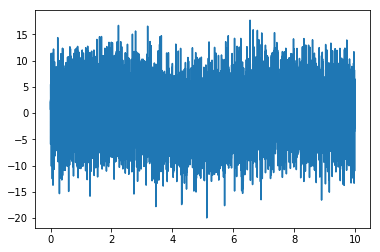

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

t = np.linspace(0, 10, 10000)
data = np.sin(t) + 5 * np.random.normal(size=len(t))
plt.plot(t, data);

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
And this is what the same signal looks like after it has been downsampled. Note that the downsampled signal has many fewer samples, and the overall noise is much smaller.
</div>

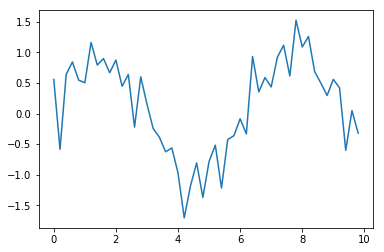

In [16]:
ds_data = downsample(data, 200)
plt.plot(t[::200], ds_data);

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Just to reiterate: We have created a useful function, and now we would like to encapsulate it into a module so that

<ul>
<li>We can re-use this function in many different places without copying it, and
<li>We can share this function with other people.
</ul>

<br>
<hr>

Here's how to turn this code into a module:
<ol>
<li>Open a code editor (pycharm, sublime, etc.) and paste in the definition of `downsample()` given above, including the `import numpy` statement.
<li>Save the file as `my_module.py` in the same location as this notebook.
</ol>
<br>
You're done!<br>

Now let's see if it works:

</div>

In [21]:
# Import the new definition of `downsample` from your module
from my_module import downsample

# If you get "ImportError: No module named my_module", then make sure
# the .py file was saved in the correct location.

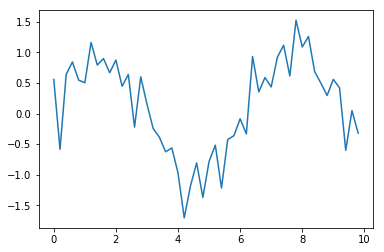

In [23]:
# test again:
ds_data = downsample(data, 200)
plt.plot(t[::200], ds_data);

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Good so far, but there are some issues with this approach:

<ul>
<li>Often we will want to encapsulate multiple files and make them appear as a single module.
<li>If we distribute this code, we will at least want to include a README to explain what it's about, so I'd really like my module to live inside its own folder.
</ul>

<br>
<hr>
So now we are going to turn this module into a <i>package</i>, which is really just a collection of modules inside a folder, along with some Python glue.
<ol>
<li>Make a new folder, in the same location as this notebook, called `my_package`
<li>Move `my_module.py` into this new folder
<li>Create an empty text file called `__init__.py` inside `my_package`. (note the double underscores)
</ol>
<br>
The `__init__.py` file is a hint to Python that tells it "this folder is a package that can be imported".

<hr>
Now let's try importing from the new package:

</div>

In [25]:
from my_package.my_module import downsample

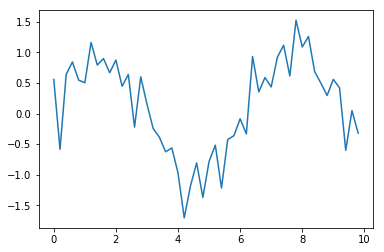

In [26]:
# test again:
ds_data = downsample(data, 200)
plt.plot(t[::200], ds_data);

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3>A note about namespaces</h3>

<p>Each python <i>file</i> that you work with has its own isolated namespace. That means we could write `x=1` inside the module, and `x=2` inside this notebook, and the two names will <i>not</i> collide; each `x` variable lives in a different namespace. `import` statements are how we create a reference from one module's namespace into another.

</div>

In [3]:
import my_package.my_module

# my_package contains a namespace with the variable "my_module"
dir(my_package)

['__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 'my_module']

In [4]:
# my_module contains its own namespace where the "downsample" function is defined and numpy has been imported
dir(my_package.my_module)

['__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 'downsample',
 'np']

In [5]:
# The notebook we are working in contains its own namespace, which includes the name "my_package",
# amongst others.
dir()

['In',
 'Out',
 '_',
 '_2',
 '_3',
 '_4',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__name__',
 '__package__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 '_sh',
 'exit',
 'get_ipython',
 'my_package',
 'quit']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Working with git</h2>
<br>
Now that we have a working package, let's start talking about version control. We are going to use `git` to record a history of all changes to all files in this package. This will enable us to do several important things:

<ul>
<li>Compare the differences between versions of the code
<li>Temporarily run other versions of the code, or revert back to an earlier version if we encounter problems
<li>Publish our code on websites like github or bitbucket
<li>Collaborate with others by automatically merging their changes with ours
</ul>

</div>

<div style="border-left: 3px solid #000; border-top: 1px solid #DDD; padding: 20px; padding-left: 10px; background: #F0FAFF; ">
<h3>First: some one-time configuration</h3>
<br>
This is needed only once per _machine_ that you work on. Tell git who you are:

<div style='color: #CCC; background-color: #000; font-family: monospace; white-space: pre; padding: 15px; margin: 10px; margin-left: 30px'><span style="color: #8DA; font-weight: bold;">$ </span><span style="color: #FFF; font-weight: bold;">git configure --global user.name "Your Full Name"</span>

<span style="color: #8DA; font-weight: bold;">$ </span><span style="color: #FFF; font-weight: bold;">git configure --global user.email your_email@domain.com</span> 
</div>

Git will use this information to annotate your commits with the correct authorship information. It is <b>not</b> used to log in to any services (like github). 

Next, tell git what editor you would like to use when writing commit messages. The default editor is <i>vim</i>. If you are not already comfortable using vim, pick one of the following:

<div style='color: #CCC; background-color: #000; font-family: monospace; white-space: pre; padding: 15px; margin: 10px; margin-left: 30px'><span style="color: #8DA; font-weight: bold;">$ </span><span style="color: #FFF; font-weight: bold;">git configure --global core.editor notepad</span>   (for windows)

<span style="color: #8DA; font-weight: bold;">$ </span><span style="color: #FFF; font-weight: bold;">git configure --global core.editor "open -W -n"</span>   (for OSX)

<span style="color: #8DA; font-weight: bold;">$ </span><span style="color: #FFF; font-weight: bold;">git configure --global core.editor "subl -n -w"</span>   (if you like sublime)
</div>
</div>

<h2>Definitions:</h2>

<p><b>Commit (n)</b> A snapshot of the state of all files in your project at one point in time. A commit includes some metadata:
<ul>
<li>Author
<li>Creation date
<li>A short description (written by the developer)
<li>A unique ID (SHA hash)
<li>Parent ID(s)
</ul>

<p><b>Commit (v)</b> To create a new commit. 

<p><b>Repository (n)</b> A folder that contains all of the files associated with a project and the history of changes made to each file. A git repository contains a `.git` subfolder that stores all data about the history of commits and the configuration of the repository.

<div style="border-left: 3px solid #000; border-top: 1px solid #DDD; padding: 20px; padding-left: 10px; background: #F0FAFF; ">
<h3>Creating a new git repository</h3>
<br>
From a command prompt, navigate to the location of your new package:

<div style='color: #CCC; background-color: #000; font-family: monospace; white-space: pre; padding: 15px; margin: 10px; margin-left: 30px'><span style="color: #8DA; font-weight: bold;">PythonBootcamp/my_package$ </span><span style="color: #FFF; font-weight: bold;">cd [some path]/PythonBootcamp/my_package</span>
</div>

Note: we are using the command prompt for this tutorial, but it is possible to execute all of the same actions using GUI tools like SourceTree. 
<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>
</div>

<div style="border-left: 3px solid #000; border-top: 1px solid #DDD; padding: 20px; padding-left: 10px; background: #F0FAFF; ">
Create a new git repository here and list the contents of the folder:

<div style='color: #CCC; background-color: #000; font-family: monospace; white-space: pre; padding: 15px; margin: 10px; margin-left: 30px'><span style="color: #8DA; font-weight: bold;">PythonBootcamp/my_package (master)$ </span><span style="color: #FFF; font-weight: bold;">git init</span>
Initialized empty Git repository in .../PythonBootcamp/my_package/.git/

<span style="color: #8DA; font-weight: bold;">PythonBootcamp/my_package$ </span><span style="color: #FFF; font-weight: bold;">ls -al</span>
total 24
drwxrwxr-x 3 luke luke 4096 Jul 25 17:06 .
drwxrwxr-x 4 luke luke 4096 Jul 25 17:05 ..
drwxrwxr-x 7 luke luke 4096 Jul 25 17:06 .git
-rw-rw-r-- 1 luke luke    0 Jul 25 14:58 \__init\__.py
-rw-rw-r-- 1 luke luke  109 Jul 25 14:58 \__init\__.pyc
-rw-rw-r-- 1 luke luke  455 Jul 25 14:45 my_module.py
-rw-rw-r-- 1 luke luke  716 Jul 25 14:58 my_module.pyc
</div>

We can see that running `git init` has created a new subfolder called `.git`. This is where git will store all of our version tracking information. This command only needs to be run once when you first create a new repository.
<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>
</div>

<div style="border-left: 3px solid #000; border-top: 1px solid #DDD; padding: 20px; padding-left: 10px; background: #F0FAFF; ">
Now use `git status` to ask git about the current state of the repository. This is a command that we will run over and over:

<div style='color: #CCC; background-color: #000; font-family: monospace; white-space: pre; padding: 15px; margin: 10px; margin-left: 30px'><span style="color: #8DA; font-weight: bold;">PythonBootcamp/my_package (master)$ </span><span style="color: #FFF; font-weight: bold;">git status</span>
On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
<span style="color: red;">
        \__init\__.py
        \__init\__.pyc
        my_module.py
        my_module.pyc
</span>
nothing added to commit but untracked files present (use "git add" to track)
</div>

There is a lot of information here, but for now let's focus on the "Untracked files" section. This tells us that there are a few files here that git has _not_ begun tracking in this repository.
<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>
</div>

<div style="border-left: 3px solid #000; border-top: 1px solid #DDD; padding: 20px; padding-left: 10px; background: #F0FAFF; ">
Let's ask git to begin tracking our two .py files:

<div style='color: #CCC; background-color: #000; font-family: monospace; white-space: pre; padding: 15px; margin: 10px; margin-left: 30px'><span style="color: #8DA; font-weight: bold;">PythonBootcamp/my_package (master)$ </span><span style="color: #FFF; font-weight: bold;">git add \__init\__.py my_module.py</span>

<span style="color: #8DA; font-weight: bold;">PythonBootcamp/my_package (master)$ </span><span style="color: #FFF; font-weight: bold;">git status</span>
On branch master

Initial commit

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
<span style='color: green'>
        new file:   \__init\__.py
        new file:   my_module.py
</span>
Untracked files:
  (use "git add <file>..." to include in what will be committed)
<span style='color: red'>
        \__init\__.pyc
        my_module.pyc
</span>
</div>

Now we can see that the files we added are listed under "Changes to be committed" instead of "Untracked files". We are ready to create our first commit. After running this command, you should be presented with a text editor containing information about the changes that are being committed. Write a short message explaining the purpose of this commit at the top of the file ("initial commit" is common for the first commit), then save and exit the editor.

<div style='color: #CCC; background-color: #000; font-family: monospace; white-space: pre; padding: 15px; margin: 10px; margin-left: 30px'><span style="color: #8DA; font-weight: bold;">PythonBootcamp/my_package (master)$ </span><span style="color: #FFF; font-weight: bold;">git commit</span>
[master (root-commit) 2ddcf4c] Initial commit
 2 files changed, 18 insertions(+)
 create mode 100644 \__init\__.py
 create mode 100644 my_module.py
</div>

Run `git status` again to verify that there are no more "Changes to be committed" and our two .py files are no longer listed under "Untracked files".

You have just created a commit. This is a snapshot of the current state of the files in the repository (just our two .py files). At any time, we will be able to return to this snapshot if we want.
<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>
</div>

<div style="border-left: 3px solid #000; border-top: 1px solid #DDD; padding: 20px; padding-left: 10px; background: #F0FAFF; ">
<h3>Adding more commits</h3>
<br>
We will now go through the motions of editing and committing code changes a few times. The basic workflow will be:

<ol>
<li>Make changes
<li>`git status`
<li>`git diff`
<li>`git add`
<li>`git commit`
</ol>

In your code editor, go back to `my_module.py` and add some more detail to the docstring:

<pre>
Parameters
----------
data : array
    The input array to be downsampled.
n : int
    Downsampling factor; this is the number of raw samples that will be averaged
    together for each new sample.
axis : int
    The array axis that should be downsampled (default=0).
</pre>

Now we'd like to commit this change. First let's see what git thinks of the situation:

<div style='color: #CCC; background-color: #000; font-family: monospace; white-space: pre; padding: 15px; margin: 10px; margin-left: 30px'><span style="color: #8DA; font-weight: bold;">PythonBootcamp/my_package (master)$ </span><span style="color: #FFF; font-weight: bold;">git status</span>
On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)
<span style="color:red">
        modified:   my_module.py
</span>
Untracked files:
  (use "git add <file>..." to include in what will be committed)
<span style="color:red">
        \__init\__.pyc
        my_module.pyc
</span>
no changes added to commit (use "git add" and/or "git commit -a")

<span style="color: #8DA; font-weight: bold;">PythonBootcamp/my_package (master)$ </span><span style="color: #FFF; font-weight: bold;">git diff</span>
<span style="color:white">diff --git a/my_module.py b/my_module.py
index 622a7d6..bf75c82 100644
--- a/my_module.py
+++ b/my_module.py</span>
<span style="color:cyan">@@ -3,6 +3,16 @@</span> import numpy as np
 def downsample(data, n, axis=0):
     """Reduce the number of samples in an array by averaging together
     n samples at a time.
<span style="color:green">+    
+    Parameters
+    ----------
+    data : array
+        The input array to be downsampled.
+    n : int
+        Downsampling factor; this is the number of raw samples that will be averaged
+        together for each new sample.
+    axis : int
+        The array axis that should be downsampled (default=0).</span>
     """
     if n <= 1:
         return data

</div>

We can see by running `git status` that git can tell we have modified `my_module.py`. We have also introduced a new command here, `git diff`, which shows us exactly what has changed since the last commit.

If you are satisfied that these changes are ready, then create the next commit:

<div style='color: #CCC; background-color: #000; font-family: monospace; white-space: pre; padding: 15px; margin: 10px; margin-left: 30px'><span style="color: #8DA; font-weight: bold;">PythonBootcamp/my_package (master)$ </span><span style="color: #FFF; font-weight: bold;">git add my_module.py</span>

<span style="color: #8DA; font-weight: bold;">PythonBootcamp/my_package (master)$ </span><span style="color: #FFF; font-weight: bold;">git commit</span>
</div>

Note that we used `git add` to "stage" the file's changes to be included in the next commit. As a shorthand, we could also have run:

<div style='color: #CCC; background-color: #000; font-family: monospace; white-space: pre; padding: 15px; margin: 10px; margin-left: 30px'><span style="color: #8DA; font-weight: bold;">PythonBootcamp/my_package (master)$ </span><span style="color: #FFF; font-weight: bold;">git commit my_module.py</span>
</div>
</div>

<div>
<h3>Git good practice #1: Make clean commits.</h3>
<br>
_Staging_ gives us finer control over which changes are included in each commit. First we tell git which changes will be included in the next commit, and then we commit all staged changes at once. In this simple example, it may seem like an unnecessary extra step. If git already knows which files have changed, why not just commit all changes automatically?

<p>When working with any version control system, it is helpful for each code snapshot to introduce changes that are _complete_ and _related_. Ideally, each new commit should add one new feature, or bugfix, or concept, and the commit should not contain unfinished ideas. Why is this good practice? Sometimes we need to go back through the history of changes to find where a bug was introduced, or to revert a set of changes, or even just to understand the structure of the commit history (which can become quite complex).

<p>But many of us don't program that way--we like to plow through the code, making many unrelated changes here and there. In practice, it is very easy (and common) to lose track of which files you have changed in between commits. Perhaps you added some temporary debugging code that you forgot to remove, or started a new file but forgot to ask git to track it, or forgot about an unfinished piece of code. 

<p><b>Get into the habit of checking the state of your repository before each commit.</b> Run `git status` and `git diff` regularly and review your work before you commit it--errors will be much easier to catch and resolve at this stage, while you still remember why you made these changes. Make an effort to organize your changes into logical, complete commits.

<p><b>BUT:</b> at the same time, balance this with the need to develop quickly; sometimes the extra organization really isn't worth the extra effort, especially when you are prototyping a new project (my commit frequency varies between once per day and several times per hour, depending on the task). Over time you will learn what works for you.

</div>

<div style="border-left: 3px solid #000; border-top: 1px solid #DDD; padding: 20px; padding-left: 10px; background: #F0FAFF; ">
<h3>A little more commit practice</h3>
<br>
Let's make a few more changes:

<ul>
<li>Add more documentation to the `downsample()` docstring:
<pre>
  ```
  Returns
  -------
  array
      An array in which each item is the average of *n* items
      from the input *data* array.
  ```
</pre>
<li>Create a `README` file describing the package
<li>Create a `.gitignore` file that contains just the text: `*.pyc`
</ul>

<p>Now use `git status` and `git diff` to review the changes. Notice that creating the `.gitignore` file causes the pyc files to be omitted when running `git status`.

<p>Commit each of your changes, one at a time. Repeat the cycle:
<ol>
<li>git status
<li>git diff
<li>git add
<li>git commit
</ol>

<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>
</div>

<div style="border-left: 3px solid #000; border-top: 1px solid #DDD; padding: 20px; padding-left: 10px; background: #F0FAFF; ">
<h3>Backtracking</h3>
<br>

One of the reasons we use version control is so that we can keep track of our changes, dig through the change history, and sometimes throw out new changes that we don't want to keep. There are many differnet reasons we could explore, and many different ways to do this, but let's just focus on two common ones:

<h4>1) I have made a mistake and would like to revert a file back to the state it was in at my most recent commit.</h4>

<p>This is pretty common: perhaps you made some changes that you would like to abandon, or accidentally deleted a file, and you just want to restore the last committed state of that file. Start by making a change to my_module.py and saving the file. Run `git diff` to see what has changed.

<p>Now discard all changes to that file using the `git checkout` command:

<div style='color: #CCC; background-color: #000; font-family: monospace; white-space: pre; padding: 15px; margin: 10px; margin-left: 30px'><span style="color: #8DA; font-weight: bold;">PythonBootcamp/my_package (master)$ </span><span style="color: #FFF; font-weight: bold;">git checkout my_module.py</span>
</div>

<p>Presto! Your file is back to its original state. A good code editor will monitor your code file and automatically refresh whenever git makes a change.
<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>
</div>

<h2>Definitions:</h2>

<p><b>Checkout (v)</b> To <i>replace</i> the contents of the files that are currently present in the repository with the contents previously stored in a commit. This can be used to affect individual files or the entire contents of the repository at once (by checking out a commit or branch instead of a single file).

<p><b>Tag (n)</b> A named pointer to a commit. This is typically used to permanently mark a specific commit in a repository such as a release version, or a version referenced in a publication. Checking out a tag usign `git checkout tagname` is the same as checking out the commit that is referenced by the tag.

<p><b>Branch (n)</b> 
<ol>
<li>A chain of related commits. This is <b>not</b> the definition understood by git.
<li>A named pointer to a specific commit. Unlike tags, branches have special property that, when they are checked out using `git checkout branchname`, creating a new commit will cause the branch to be updated to point to the new commit. In this way, branches usually point to the most recent commit in any chain of commits.
</ol>

<p><b>Branch (v)</b> To create a new branch using `git branch`.

<div style="border-left: 3px solid #000; border-top: 1px solid #DDD; padding: 20px; padding-left: 10px; background: #F0FAFF; ">
<h4>2) I'm deep in developing a new feature. Right now all of my code is broken and I just want to run an older version of my code, and then return to developing my feature.</h4>

<p>Here's how we will handle this:
<ol>
<li>Commit all of our pending changes, if we are at a good stopping place. If not, use `git stash` to make a <i>temporary</i> commit that we can come back to and finish later.
<li><i>Check out</i> an old commit where things were working well
<li>Check out our latest commit, use `git stash pop` to restore the changes we were working on, and continue working
</ol>

<p>Start by making some changes to my_module.py that will prevent it from running. You are deep in thought, but a colleague has just approached and asked for a demo of your code (which is currently broken). 

<p>Stash your changes with `git stash` 

<div style='color: #CCC; background-color: #000; font-family: monospace; white-space: pre; padding: 15px; margin: 10px; margin-left: 30px'><span style="color: #8DA; font-weight: bold;">PythonBootcamp/my_package (master)$ </span><span style="color: #FFF; font-weight: bold;">git stash</span>
Saved working directory and index state WIP on master: 31f49fb Add more documentation
HEAD is now at 31f49fb Add more documentation
</div>

<p>Running git stash has taken all of your work in progress (including anything staged) and turned it into a temporary commit. Look back at your code editor; you should find that the changes you began are now gone. If this makes you nervous, remember: <i>git</i> is in control of your code, not your editor.

<p>Now that the working tree is clean (there are no uncommitted changes lying around), we are free to "check out" any previous commit to see what the code looked like at that time. In gitk, click on the initial commit and look at the SHA value. This is a long hexadecimal number that we can use as a unique identifier for this particular commit. Use the `git checkout` command to roll back the current state of the repository to our first commit:

<div style='color: #CCC; background-color: #000; font-family: monospace; white-space: pre; padding: 15px; margin: 10px; margin-left: 30px'><span style="color: #8DA; font-weight: bold;">PythonBootcamp/my_package (master)$ </span><span style="color: #FFF; font-weight: bold;">git checkout f6dfa278</span>   (write in the first few digits of your SHA)
Note: checking out 'f6dfa278'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at f6dfa27... Initial commit
</div>

Now: 
<ul>
<li>Press F5 in gitk to see what has changed: "master" still points to the same place, and our stash is still in place, but the initial commit line is highlighted in bold to indicate that it is currently checked out.
<li>Look at your code editor and note that our docstring changes are gone.
<li>Run `ls` from the command line and note that the README and .gitignore files are gone.
</ul>

<p>From here, we can demo the code as it functioned when it was first committed. When we are ready to resume developing, we check out the latest commit, and then unstash the changes we were working on:

<div style='color: #CCC; background-color: #000; font-family: monospace; white-space: pre; padding: 15px; margin: 10px; margin-left: 30px'><span style="color: #8DA; font-weight: bold;">PythonBootcamp/my_package ((HEAD detached at f6dfa27))$ </span><span style="color: #FFF; font-weight: bold;">git checkout master</span>
Previous HEAD position was f6dfa27... Initial commit
Switched to branch 'master'

<span style="color: #8DA; font-weight: bold;">PythonBootcamp/my_package (master)$ </span><span style="color: #FFF; font-weight: bold;">git stash pop</span>
On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)
<span style="color:red">
        modified:   my_module.py
</span>
no changes added to commit (use "git add" and/or "git commit -a")
Dropped refs/stash@{0} (f0dce4f101f17bf602e0b002ab10bd20877817e1)
</div>

<p>Note: when we checked out the initial commit using its SHA ID, we were given a warning that "You are in 'detached HEAD' state." and the prompt changed from (master) to ((HEAD detached at f6dfa27)). What's going on here? We said earlier that when a branch (like master) is checked out, it automatically updates to point to the last commit you have made. A branch is the pointer that keeps track of your progress. When you check out a commit (using its SHA ID or tag name), there is no longer any automated mechanism that tracks this progress for you. You can still make commits, but there will be no branch pointing to those commits to remind you of what your were working on.

<p>The practical takeaway is: if you don't have a branch checked out (if your HEAD is detached), you probably should not change any files or make new commits, because these commits will not have a branch name associated with them and are likely to be lost.

<div> <!-- NOTE: this div is a workaround for a jupyter HTML export bug --> </div>
</div>